In [1]:
import cv2
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from skimage import transform  
import shutil

In [4]:
# Path to the predictions CSV file
noktapellgregory37_38_predictions_file_path = '../logs/test/ensemble/Ensemble/predictions/37-38-PG-Predictions.csv'
noktapellgregory47_48_predictions_file_path = '../logs/test/ensemble/Ensemble/predictions/47-48-PG-Predictions.csv'

# Directory to save the text files
noktapellgregory37_38_output_directory = '../data/final-data/predictions/5noktapellgregory37-38'
noktapellgregory47_48_output_directory = '../data/final-data/predictions/5noktapellgregory47-48'

# Create the output directory if it doesn't exist
if not os.path.exists(noktapellgregory37_38_output_directory):
    os.makedirs(noktapellgregory37_38_output_directory)
    
if not os.path.exists(noktapellgregory47_48_output_directory):
    os.makedirs(noktapellgregory47_48_output_directory)

# Read the CSV file
with open(noktapellgregory37_38_predictions_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Extract the file name
        file_name = row['file']
        # Extract the coordinates and convert to integers
        coordinates = [(int(float(row[f'{i}_x'])), int(float(row[f'{i}_y']))) for i in range(5)]
        # Write the coordinates to the text file
        with open(os.path.join(noktapellgregory37_38_output_directory, f'{os.path.splitext(file_name)[0]}.txt'), 'w') as f:
            for i, (x, y) in enumerate(coordinates):
                f.write(f"{x},{y}\n")


In [5]:
# Read the CSV file
with open(noktapellgregory47_48_predictions_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Extract the file name
        file_name = row['file']
        # Extract the coordinates and convert to integers
        coordinates = [(int(float(row[f'{i}_x'])), int(float(row[f'{i}_y']))) for i in range(5)]
        # Write the coordinates to the text file
        with open(os.path.join(noktapellgregory47_48_output_directory, f'{os.path.splitext(file_name)[0]}.txt'), 'w') as f:
            for i, (x, y) in enumerate(coordinates):
                f.write(f"{x},{y}\n")

In [6]:
def plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_file):
    """
    Plots points on images based on coordinates from separate files and displays them.

    Parameters:
        original_coordinates_file (str): Path to the file containing original coordinates.
        prediction_coordinates_file (str): Path to the file containing prediction coordinates.
        image_file (str): Path to the image file.
    """
    img = cv2.imread(image_file)

    # Read coordinates from the original coordinate file
    with open(original_coordinates_file, 'r') as original_file:
        original_coordinates = [line.strip() for line in original_file.readlines()]

    # Draw original points on the image
    print("Original Points")
    for i, original_coord in enumerate(original_coordinates, 1):
        x, y = map(int, original_coord.split(','))
        print(x, y)
        color = (0, 255, 0)  # Green color
        cv2.circle(img, (x, y), 5, color, -1)

    # Read prediction coordinates from the prediction coordinate file
    print("Predicted Points")
    if os.path.exists(prediction_coordinates_file):
        with open(prediction_coordinates_file, 'r') as prediction_file:
            prediction_coordinates = [line.strip() for line in prediction_file.readlines()]
            for i, prediction_coord in enumerate(prediction_coordinates, 1):
                x, y = map(int, prediction_coord.split(','))
                print(x, y)
                color = (0, 0, 255)  # Red color
                cv2.circle(img, (x, y), 5, color, -1)

    # Display the image with points using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Image with Points: {image_file}")
    plt.axis('off')
    plt.show()

In [ ]:
original_coordinates_file = '../data/final-data/resized/annotations/5noktapellgregory37-38/test/131-126-k.txt'
prediction_coordinates_file = '../data/final-data/predictions/5noktapellgregory37-38/131-126-k.txt'
image_dir = '../data/final-data/resized/images/5noktapellgregory37-38/131-126-k.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

Original Points
267 335
243 323
262 374
213 347
210 309
Predicted Points
266 335
241 323
266 373
215 349
189 298


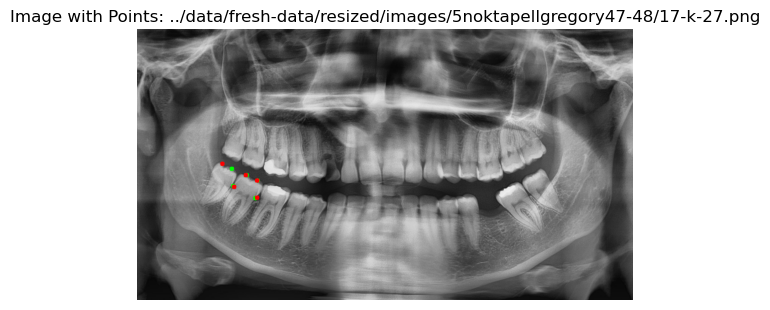

Original Points
292 327
270 324
298 372
248 361
234 310
Predicted Points
296 333
271 326
296 370
245 356
232 307


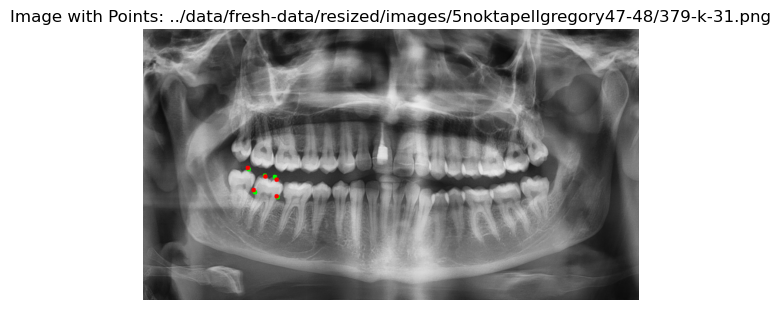

Original Points
293 314
269 307
293 357
243 341
235 292
Predicted Points
292 316
266 307
292 356
241 338
232 288


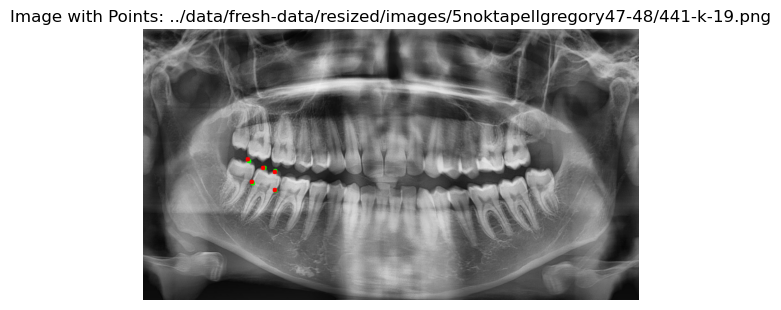

In [28]:
original_coordinates_file = '../data/fresh-data/resized/annotations/5noktapellgregory47-48/test/17-k-27.txt'
prediction_coordinates_file = '../data/fresh-data/predictions/5noktapellgregory47-48/17-k-27.txt'
image_dir = '../data/fresh-data/resized/images/5noktapellgregory47-48/17-k-27.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

# *******************

original_coordinates_file = '../data/fresh-data/resized/annotations/5noktapellgregory47-48/test/379-k-31.txt'
prediction_coordinates_file = '../data/fresh-data/predictions/5noktapellgregory47-48/379-k-31.txt'
image_dir = '../data/fresh-data/resized/images/5noktapellgregory47-48/379-k-31.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

# *******************

original_coordinates_file = '../data/fresh-data/resized/annotations/5noktapellgregory47-48/test/441-k-19.txt'
prediction_coordinates_file = '../data/fresh-data/predictions/5noktapellgregory47-48/441-k-19.txt'
image_dir = '../data/fresh-data/resized/images/5noktapellgregory47-48/441-k-19.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)